In [1]:
import numpy as np

In [2]:
def softmax(z):
    return (np.exp(z.T) / np.sum(np.exp(z), axis=1)).T



class SoftmaxRegression():
    """
    Parameters:
    -----------
    n_iterations: The number of training iterations the algorithm will tune the weights for.
    learning_rate: The step length that will be used when updating the weights.
    weights: The weights will be used to calculate output
    n_labels: Number of training labels
    loss: The loss after each iteration
    """
    def __init__(self, n_iterations = 1000, learning_rate = 0.1):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.weights = None
        self.n_labels = 2
        self.loss = np.zeros(n_iterations)


    def init_weight(self, n_features, n_labels):
   
        # Init weights all zero values
        self.weights = np.ones((n_features, n_labels))

    def fit(self, X, y):

        # Insert one more column value 1 for bias
        X = np.insert(X, 0, 1, axis=1)

        n_samples, n_features = X.shape
        self.n_labels = len(np.unique(y))

        self.init_weight(n_features, self.n_labels)

        # One hot encoding label
        onehot_encoder = OneHotEncoder(sparse=False)
        y_target = onehot_encoder.fit_transform(y)

   

        # Do gradient descent for n_iterations
        for i in range(self.n_iterations):

            #Calculate y prediction
            y_pred = softmax(np.dot(X, self.weights))

            # Calculate Cross Entropy Loss
            self.loss[i] = np.mean(-np.sum(np.log(y_pred) * (y_target), axis=1))
            
            grad = (1/n_samples) * np.dot(X.T, (y_pred-y_target))

            #Update weights
            self.weights -= self.learning_rate * grad


    def predict(self, X):

        X = np.insert(X, 0, 1, axis=1)

        y_pred = X.dot(self.weights)

        return np.argmax(softmax(y_pred), axis=1)



In [3]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.preprocessing import normalize, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
data = load_iris()

In [5]:
np.random.seed(42)

In [6]:
X = data.data
y = data.target

In [7]:
X = normalize(X, norm='max', axis=0)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

y_train = y_train.reshape(-1, 1)

In [9]:
model = SoftmaxRegression(learning_rate = 0.2)
model.fit(X_train[:, 2:], y_train)

c:\users\nguyen duc\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [10]:
y_pred = model.predict(X_train[:, 2:])

Now we're gonna draw decision boundary on training set

In [11]:
import matplotlib.pyplot as plt

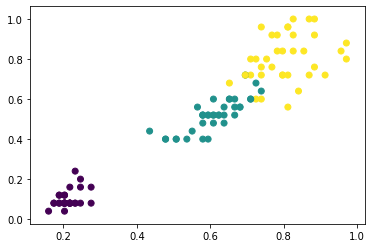

In [12]:
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train.flatten())

In [13]:
w = model.weights
w

array([[ 4.79997693,  1.36514869, -3.16512562],
       [-3.08621342,  2.13412066,  3.95209275],
       [-3.88245043,  0.86993004,  6.01252039]])

In [14]:
x1 = np.linspace(0.3, 1, 100)
x3 = np.linspace(0.1, 0.7, 50)

In [15]:
line1 = (-w[0, 0] - w[1, 0]*x1)/w[2, 0]

line3 = (-w[0, 2] - w[1, 2]*x3)/w[2, 2]

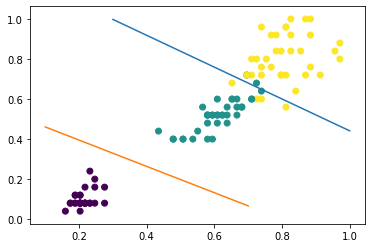

In [16]:
plt.scatter(X_train[:, 2], X_train[:, 3], c=y_train.flatten())
plt.plot(x1, line1)
plt.plot(x3, line3)


In [17]:
y_pred = model.predict(X_test[:, 2:])

In [18]:
print("Our model accuracy: %.2f %%" %(100*accuracy_score(y_test.flatten(), y_pred)))

Our model accuracy: 100.00 %
